<a href="https://colab.research.google.com/github/Waleedprw22/Work_Public/blob/main/Encoded_Decision_Tree_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score




In [ ]:
salary = pd.read_csv("Clean_AdultData - Clean_AdultData.csv")
salary_test = pd.read_csv("Clean_AdultTest_Updated.csv")
# 3 places: USA, Europe, Asia. "One hot encoding" is as follows: [0,0] - Neither Europe or Asia -> then 1, USA. 2, Europe -> [1,0]. 3, Asia -> [0,1]
#salary

list(salary_test.columns.values)


['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Divorced',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-ma

In [ ]:
def error_rate(p: float):
    """Classification error rate for a given binary class ratio"""
    return p if p < 0.5 else 1 - p

def gini_index(p: float):
    """Gini index for a given binary class ratio."""
    return 2 * p * (1 - p)

def entropy(p: float):
    """Entropy for a given binary class ratio, normalized by ln(2)"""
    return -(p * np.log(p + 1e-16) + (1 - p) * np.log(1 - p + 1e-16)) / (np.log(2) / 0.5)

list(salary.columns.values)
#one_hot_encoded_data = pd.get_dummies(salary, columns = ['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'])
#one_hot_encoded_data

#one_hot_encoded_data = one_hot_encoded_data.dropna()

#list(one_hot_encoded_data.columns.values)


['Unnamed: 0',
 'age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Divorced',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occu

In [ ]:
dt_model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    )

features =[
 'age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 #'education_ 10th',
 #'education_ 11th',
 #'education_ 12th',
 #'education_ 1st-4th',
 #'education_ 5th-6th',
 #'education_ 7th-8th',
 #'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 #'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Divorced',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 #'relationship_ Husband',
 #'relationship_ Not-in-family',
 #'relationship_ Other-relative',
 #'relationship_ Own-child',
 #'relationship_ Unmarried',
 #'relationship_ Wife',
 'race_ Amer-Indian-Eskimo',
 'race_ Asian-Pac-Islander',
 'race_ Black',
 'race_ Other',
 'race_ White',
 'sex_ Female',
 'sex_ Male',
# 'native_country_ Cambodia',
# 'native_country_ Canada',
# 'native_country_ China',
# 'native_country_ Columbia',
# 'native_country_ Cuba',
# 'native_country_ Dominican-Republic',
# 'native_country_ Ecuador',
# 'native_country_ El-Salvador',
# 'native_country_ England',
# 'native_country_ France',
# 'native_country_ Germany',
# 'native_country_ Greece',
# 'native_country_ Guatemala',
# 'native_country_ Haiti',
# 'native_country_ Holand-Netherlands',

# 'native_country_ Honduras',
# 'native_country_ Hong',
# 'native_country_ Hungary',
# 'native_country_ India',
# 'native_country_ Iran',
# 'native_country_ Ireland',
# 'native_country_ Italy',
# 'native_country_ Jamaica',
# 'native_country_ Japan',
# 'native_country_ Laos',
# 'native_country_ Mexico',
# 'native_country_ Nicaragua',
# 'native_country_ Outlying-US(Guam-USVI-etc)',
# 'native_country_ Peru',
# 'native_country_ Philippines',
# 'native_country_ Poland',
# 'native_country_ Portugal',
# 'native_country_ Puerto-Rico',
# 'native_country_ Scotland',
# 'native_country_ South',
# 'native_country_ Taiwan',
# 'native_country_ Thailand',
# 'native_country_ Trinadad&Tobago',
# 'native_country_ United-States',
# 'native_country_ Vietnam',
# 'native_country_ Yugoslavia',

 ]

label = 'income_ >50K'

X = salary[features]
X_test = salary_test[features]
Y_test = salary_test[label]
Y = salary[label]



In [ ]:
#dt_model = tree.DecisionTreeClassifier( criterion="entropy", max_depth=1, )

#plt.figure()

#dt_model.fit(X=cancer[["texture_mean"]], y=cancer["label"]) _ =
#tree.plot_tree(dt_model, feature_names=["texture_mean"], filled=True) plt.show()

SyntaxError: ignored

In [ ]:
#dt_model.fit(X=one_hot_encoded_data[features], y=one_hot_encoded_data[label])
dt_model.fit(X, Y)



DecisionTreeClassifier(max_depth=3)

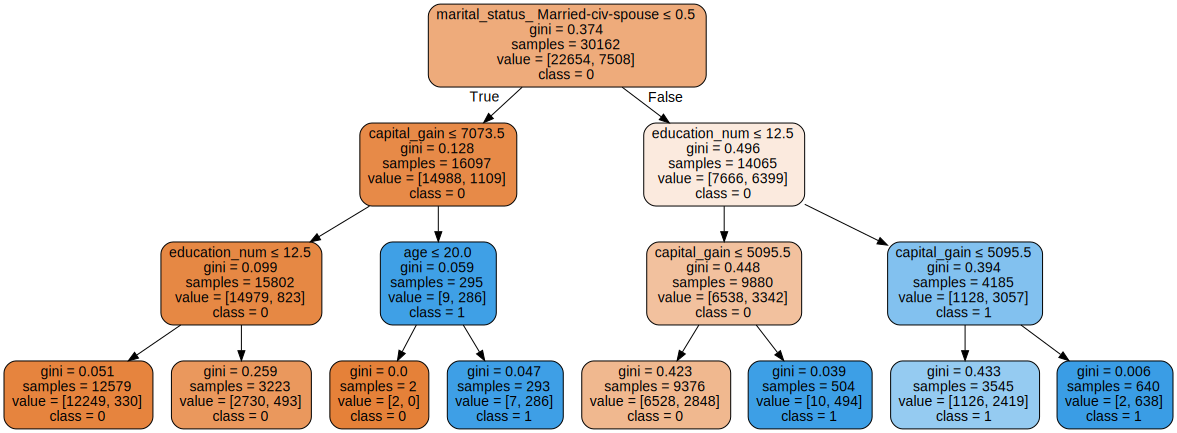

In [ ]:
import graphviz

dot_data = tree.export_graphviz(
    decision_tree=dt_model,
    out_file=None,
    feature_names=features,
    class_names=["0", "1"],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3,
)
graph = graphviz.Source(dot_data)
graph.render("salary_tree")
graph

In [ ]:
y_train_pred = dt_model.predict(X)
y_test_pred = dt_model.predict(X_test)

trainaccuracy= accuracy_score(Y, y_train_pred)
testaccuracy= accuracy_score(Y_test, y_test_pred)

confusion_TRN = confusion_matrix(Y, y_train_pred)
confusion_TST = confusion_matrix(Y_test, y_test_pred)

In [ ]:
TP = confusion_TRN[1,1] # true positive
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

TP_TST = confusion_TST[1,1] # true positive
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)

testsensitivity= TP_TST / float(TP_TST+FN_TST)
testspecificity= TN_TST / float(TN_TST+FP_TST)

# Let us compare the values obtained for Train & Test:
print('-'*30)
print('On Train Data')
print('-'*30)
print("Accuracy    : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((trainsensitivity*100),2)))
print("Specificity : {} %".format(round((trainspecificity*100),2)))
print('-'*30)
print('On Test Data')
print('-'*30)
print("Accuracy    : {} %".format(round((testaccuracy*100),2)))
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))
print('-'*30)

------------------------------
On Train Data
------------------------------
Accuracy    : 84.03 %
Sensitivity : 51.11 %
Specificity : 94.95 %
------------------------------
On Test Data
------------------------------
Accuracy    : 83.92 %
Sensitivity : 50.49 %
Specificity : 94.82 %
------------------------------


In [ ]:
from sklearn.metrics import balanced_accuracy_score
print(TP_TST)
print(TN_TST)
print(FN_TST)
print(FP_TST)

balanced_accuracy_score(Y_test, y_test_pred)

1868
10771
1832
589


0.7265081366577846